En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

# Set up

In [6]:
#descomprimir el zip para obtener el json con los tweets

import zipfile

with zipfile.ZipFile('../data/tweets.json.zip', 'r') as zip_ref:
    zip_ref.extract('farmers-protest-tweets-2021-2-4.json', '../data')


In [3]:
file_path = "../data/farmers-protest-tweets-2021-2-4.json"

In [4]:
%load_ext memory_profiler

## Memory

### q1_memory

#### Optimización de Memoria en la Función `q1_memory`

La función `q1_memory` procesa un archivo de tweets en formato JSON para encontrar las 10 fechas con más tweets y el usuario con más tweets en cada una de esas fechas. Está optimizada para ser eficiente en el uso de memoria de la siguiente manera:

1. **Lectura Lineal del Archivo**:
    ```python
    with open(file_path, 'rb') as file:
        for line in file:
            tweet = orjson.loads(line)
            process_tweet(tweet)
    ```
    Se lee y procesa cada línea del archivo de manera secuencial, evitando cargar todo el archivo en memoria.

2. **Uso de `orjson`**:
    `orjson` es una biblioteca JSON rápida y eficiente en memoria.

3. **Uso de `Counter`**:
    ```python
    date_tweet_count = Counter()
    date_user_count = {}
    ```
    `Counter` se utiliza para contar tweets por fecha y por usuario, siendo eficiente en memoria y rápido para realizar contajes.

4. **Procesamiento Directo del Tweet**:
    ```python
    def process_tweet(tweet):
        date = datetime.datetime.strptime(tweet['date'][:10], '%Y-%m-%d').date()
        username = tweet['user']['username']
        
        date_tweet_count[date] += 1
        if date not in date_user_count:
            date_user_count[date] = Counter()
        date_user_count[date][username] += 1
    ```
    Cada tweet se procesa inmediatamente al ser leído, extrayendo y contando la fecha y el usuario.

5. **Selección Eficiente de Fechas**:
    ```python
    top_10_dates = date_tweet_count.most_common(10)
    ```
    Se seleccionan las 10 fechas con más tweets usando `most_common`, que es rápido y eficiente.

6. **Compilación del Resultado**:
    ```python
    result = [
        (date, date_user_count[date].most_common(1)[0][0])
        for date, _ in top_10_dates
    ]
    ```
    Se busca el usuario con más tweets en cada fecha seleccionada, minimizando búsquedas y manteniendo bajo el uso de memoria.

### Resumen

La función `q1_memory` es eficiente en el uso de memoria mediante la lectura secuencial, el uso de `orjson`, `Counter`, y el procesamiento directo de cada tweet. Esto permite manejar archivos grandes sin agotar la memoria disponible.


In [5]:
from q1_memory import q1_memory

print(q1_memory(file_path))

[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


In [4]:
%mprun -f q1_memory q1_memory(file_path)

Filename: c:\Users\santiago.codaro\Downloads\challenge_DE\src\q1_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6     69.6 MiB     69.6 MiB           1   def q1_memory(file_path: str) -> List[Tuple[datetime.date, str]]:
     7                                             """
     8                                             Procesa un archivo de tweets en formato JSON para encontrar las 10 fechas
     9                                             con más tweets y el usuario con más tweets en cada una de esas fechas.
    10                                         
    11                                             La función esta optimizada para ser eficiente en el uso de la memoria.
    12                                         
    13                                             Args:
    14                                                 file_path (str): Ruta al archivo que contiene los datos de los tweets.
    15                                        

Observaciones:

- ijson permite transmitir archivos JSON grandes, procesando un tweet a la vez en lugar de cargar todo el archivo en la memoria.
- Usar un diccionario regular para date_user_count reduce la sobrecarga de memoria en comparación con defaultdict.
- La expresión generadora en la creación del resultado evita la creación de una lista intermedia.

### q2_memory

Los top 10 emojis más usados con su respectivo conteo.

In [5]:
from q2_memory import q2_memory

print(q2_memory(file_path))

[('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]


In [6]:
%mprun -f q2_memory q2_memory(file_path)

Filename: c:\Users\santiago.codaro\Downloads\challenge_DE\src\q2_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     8     72.7 MiB     72.7 MiB           1   def q2_memory(file_path: str) -> List[Tuple[str, int]]:
     9                                             """
    10                                             Procesa un archivo de tweets en formato JSON para encontrar los 10 emojis
    11                                             más usados y su cantidad de usos.
    12                                         
    13                                             Esta función está optimizada para un uso eficiente de la memoria.
    14                                             Args:
    15                                                 file_path (str): Ruta al archivo que contiene los datos de los tweets.
    16                                         
    17                                             Returns:
    18                                

### q3_memory

El top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos

In [7]:
from q3_memory import q3_memory

print(q3_memory(file_path))

[('narendramodi', 2265), ('Kisanektamorcha', 1840), ('RakeshTikaitBKU', 1644), ('PMOIndia', 1427), ('RahulGandhi', 1146), ('GretaThunberg', 1048), ('RaviSinghKA', 1019), ('rihanna', 986), ('UNHumanRights', 962), ('meenaharris', 926)]


In [8]:
%mprun -f q3_memory q3_memory(file_path)

Filename: c:\Users\santiago.codaro\Downloads\challenge_DE\src\q3_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     5     71.4 MiB     71.4 MiB           1   def q3_memory(file_path: str) -> List[Tuple[str, int]]:
     6                                             """
     7                                             Procesa un archivo de tweets en formato JSON para encontrar los 10 usuarios 
     8                                             más mencionados y su cantidad de menciones.
     9                                         
    10                                             Esta función está optimizada para un uso eficiente de la memoria.
    11                                             Args:
    12                                                 file_path (str): Ruta al archivo que contiene los datos de los tweets.
    13                                         
    14                                             Returns:
    15                   

# Time




## q1_time

#### Optimización por Tiempo

La función `q1_time` está diseñada para ser eficiente en términos de tiempo. Aquí están algunos aspectos clave de la optimización:

1. **Pre-asignación de Memoria**:
    - Utiliza arreglos de `numpy` pre-asignados para contar tweets, lo cual es mucho más rápido que las estructuras dinámicas como listas o diccionarios.

2. **Uso de `mmap`**:
    - Emplea `mmap` para mapear el archivo completo en memoria, permitiendo el acceso a los datos sin necesidad de cargarlos completamente en memoria RAM. Esto es especialmente útil para archivos grandes.

3. **Conversión Eficiente de Fechas**:
    - La conversión de fechas a índices de días permite un acceso rápido y directo a las posiciones en los arreglos pre-asignados.

4. **Ordenamiento y Selección**:
    - Utiliza `np.argsort` para ordenar y seleccionar las fechas con más tweets de manera eficiente, evitando bucles innecesarios y complejidad adicional.

Estas optimizaciones combinadas hacen que la función sea adecuada para manejar grandes volúmenes de datos de manera rápida y eficiente.

In [9]:
from q1_time import q1_time

print(q1_time(file_path))

[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


A continuación, se vuelve a ejecutar la función pero con profiling:

In [10]:
import subprocess
import os
import time

# Get the PID of the current Jupyter Notebook kernel
pid = os.getpid()
print(f"Jupyter Notebook kernel PID: {pid}")

# Define the command to run py-spy
command = ["py-spy", "record", "-o", "profile.svg", "--pid", str(pid), "--duration", "8"]

# Start profiling in the background
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("Profiling in progress...")

# Allow some time for profiling setup (if needed)
time.sleep(1)

# Execute the function you want to profile
print(q1_time(file_path))

# Wait for the profiling process to complete
process.communicate()

print("Profiling complete. Output saved to profile.svg")


Jupyter Notebook kernel PID: 22628
Profiling in progress...
[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]
Profiling complete. Output saved to profile.svg


Ya se puede ver el resultado del profiling en profile.svg.

Este fue el resultado del profiling de la función q1_time:

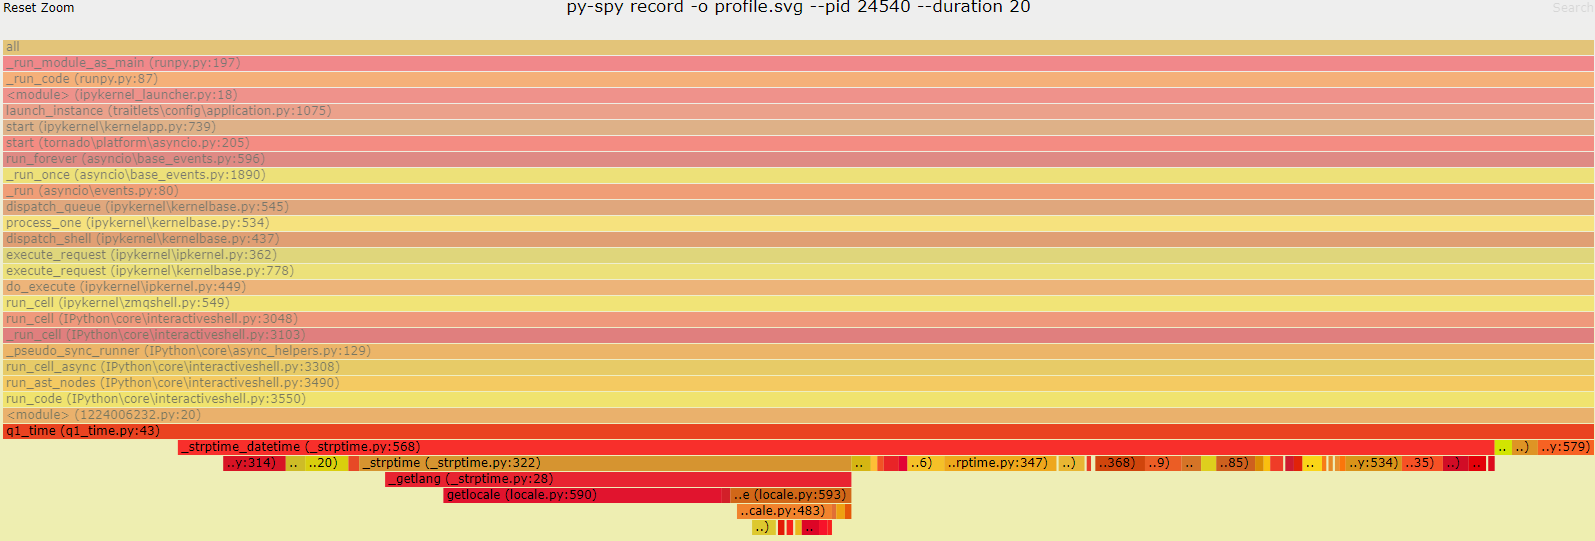

## q2_time

Los top 10 emojis más usados con su respectivo conteo. Debe incluir las siguientes funciones:

In [11]:
from q2_time import q2_time

print(q2_time(file_path))

[('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]


In [12]:
#run profiling

import subprocess
import os
import time

# Get the PID of the current Jupyter Notebook kernel
pid = os.getpid()
print(f"Jupyter Notebook kernel PID: {pid}")

# Define the command to run py-spy
command = ["py-spy", "record", "-o", "profile.svg", "--pid", str(pid), "--duration", "10"]

# Start profiling in the background
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("Profiling in progress...")

# Allow some time for profiling setup (if needed)
time.sleep(1)

# Execute the function you want to profile
print(q2_time(file_path))

# Wait for the profiling process to complete
process.communicate()

print("Profiling complete. Output saved to profile.svg")


Jupyter Notebook kernel PID: 22628
Profiling in progress...
[('🙏', 1898), ('❤️', 934), ('🌾', 497), ('💚', 486), ('😂', 486), ('👍', 456), ('👉', 450), ('✊', 412), ('🇮🇳', 397), ('🙏🙏', 379)]
Profiling complete. Output saved to profile.svg


## q3_time

El top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos. 

In [13]:
from q3_time import q3_time

print(q3_time(file_path))

[('narendramodi', 2265), ('Kisanektamorcha', 1840), ('RakeshTikaitBKU', 1644), ('PMOIndia', 1427), ('RahulGandhi', 1146), ('GretaThunberg', 1048), ('RaviSinghKA', 1019), ('rihanna', 986), ('UNHumanRights', 962), ('meenaharris', 926)]


In [14]:
#run profiling

import subprocess
import os
import time

# Get the PID of the current Jupyter Notebook kernel
pid = os.getpid()
print(f"Jupyter Notebook kernel PID: {pid}")

# Define the command to run py-spy
command = ["py-spy", "record", "-o", "profile.svg", "--pid", str(pid), "--duration", "6"]

# Start profiling in the background
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("Profiling in progress...")

# Allow some time for profiling setup (if needed)
time.sleep(1)

# Execute the function you want to profile
print(q3_time(file_path))

# Wait for the profiling process to complete
process.communicate()

print("Profiling complete. Output saved to profile.svg")

Jupyter Notebook kernel PID: 22628
Profiling in progress...
[('narendramodi', 2265), ('Kisanektamorcha', 1840), ('RakeshTikaitBKU', 1644), ('PMOIndia', 1427), ('RahulGandhi', 1146), ('GretaThunberg', 1048), ('RaviSinghKA', 1019), ('rihanna', 986), ('UNHumanRights', 962), ('meenaharris', 926)]
Profiling complete. Output saved to profile.svg
